In [2]:
import os
import time
import torch

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from FLTrack.models import ShallowNN
from FLTrack.utils import load_file, get_all_possible_pairs
from FLTrack.evals import evaluate, pairwise_euclidean_distance , influence, calculate_hessian_flattened

features = 197
batch_size = 64
loss_fn = torch.nn.L1Loss()

In [3]:
client_ids = [f"{i}_{j}" for i in range(4) for j in range(6)]

## One round 25 local epochs

In [4]:
global_model_path = 'checkpt/saving/epoch_500/global_1/global_model.pth'
global_model = ShallowNN(features)
global_model.load_state_dict(torch.load(global_model_path))

<All keys matched successfully>

In [5]:
eval_list = []
for client in client_ids:
    
    val_data_path =  "testpt/"+str(client)+".pt"
    val_set = torch.load(val_data_path)
    val_loader = DataLoader(val_set, batch_size, shuffle = True)
    
    isolated_model_path = "checkpt/saving/epoch_500/global_1/clients/client_model_"+str(client)+".pth"
    isolated_model =  ShallowNN(features)
    isolated_model.load_state_dict(torch.load(isolated_model_path))
    
    _, _ , isolated_mae = evaluate(isolated_model, val_loader, loss_fn)
    _, _ , global_mae = evaluate(global_model,val_loader,loss_fn)
    
    eval_dict = {"client_id":client, "Isolated Model MAE": round(isolated_mae, 4), "Federated Model MAE" :round(global_mae, 4)}
    eval_list.append(eval_dict)

In [6]:
eval_df = pd.DataFrame.from_dict(eval_list)
eval_df["clients"] = [i for i in range(1,25)] 

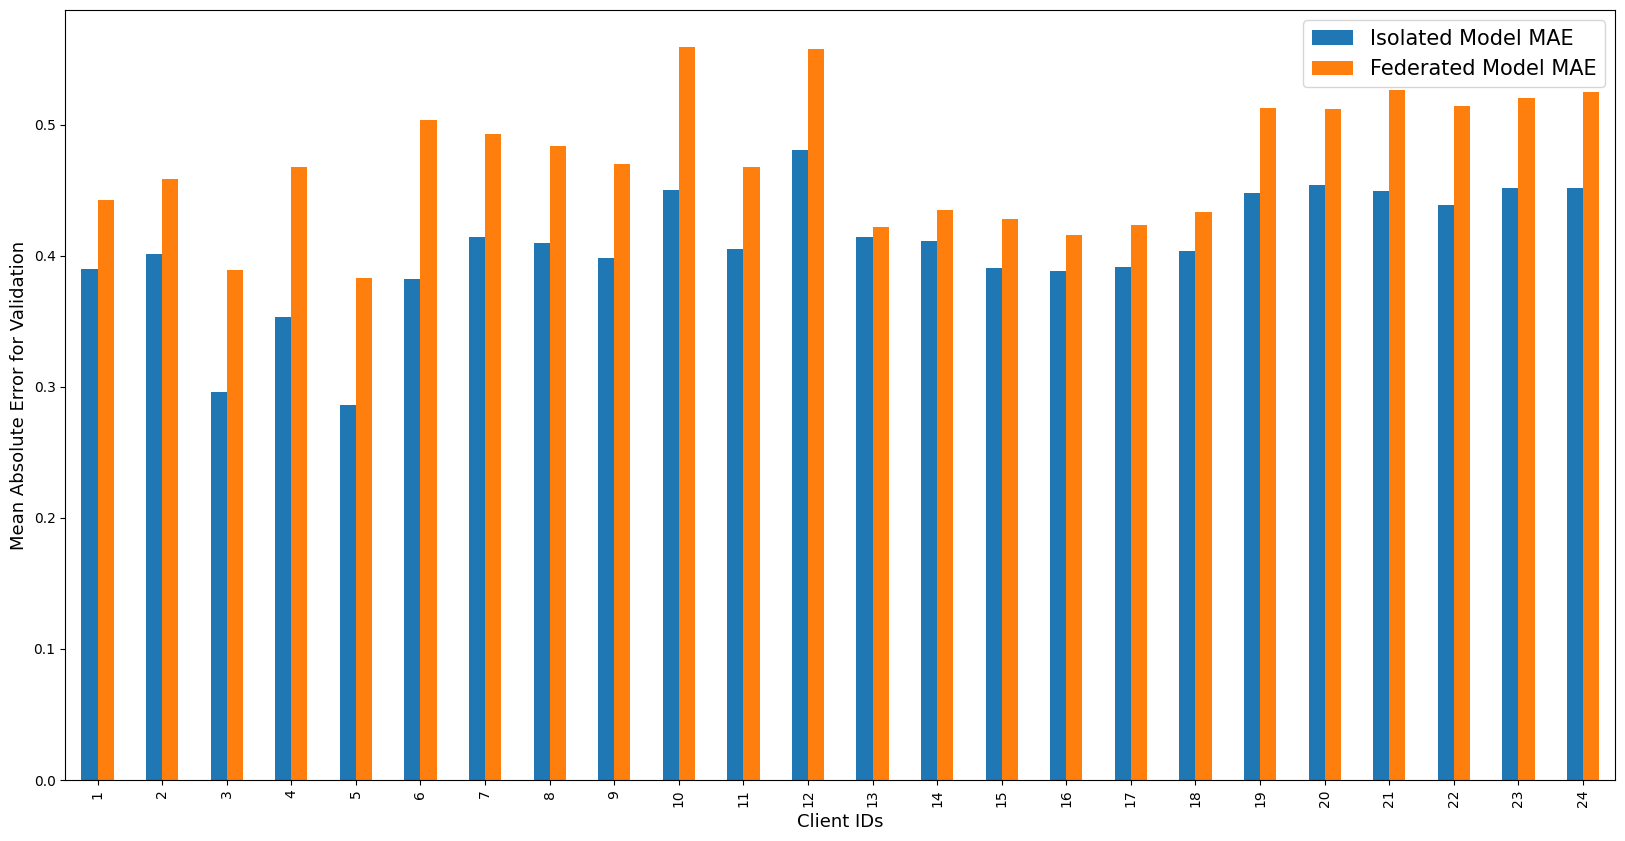

In [7]:
ax = eval_df.plot.bar(x="clients",figsize=(20, 10))
ax.set_ylabel("Mean Absolute Error for Validation",fontdict={'fontsize':13})
ax.set_xlabel("Client IDs",fontdict={'fontsize':13})
ax.legend(fontsize=15, loc="upper right")

In [8]:
ben_list = []
for index, row in eval_df.iterrows():
    ben_list.append(round(row['Isolated Model MAE']-row['Federated Model MAE'],4))
eval_df["Benefit"] = ben_list

In [10]:
eval_df.to_csv("insights/benefit_25.csv", index=False)

## 500 round 500 local epochs

In [25]:
eval_list = []
for client in client_ids:
    
    val_data_path =  "testpt/"+str(client)+".pt"
    val_set = torch.load(val_data_path)
    val_loader = DataLoader(val_set, batch_size, shuffle = True)
    
    isolated_model_path = "checkpt/epoch_500/isolated/batch64_client_"+str(client)+".pth"
    isolated_model =  ShallowNN(features)
    isolated_model.load_state_dict(torch.load(isolated_model_path))
    
    _, _ , isolated_mae = evaluate(isolated_model, val_loader, loss_fn)
    _, _ , global_mae = evaluate(global_model,val_loader,loss_fn)
    
    eval_dict = {"client_id":client, "Isolated Model MAE": round(isolated_mae, 4), "Federated Model MAE" :round(global_mae, 4)}
    eval_list.append(eval_dict)
    
eval_df = pd.DataFrame.from_dict(eval_list)
eval_df["clients"] = [i for i in range(1,25)] 

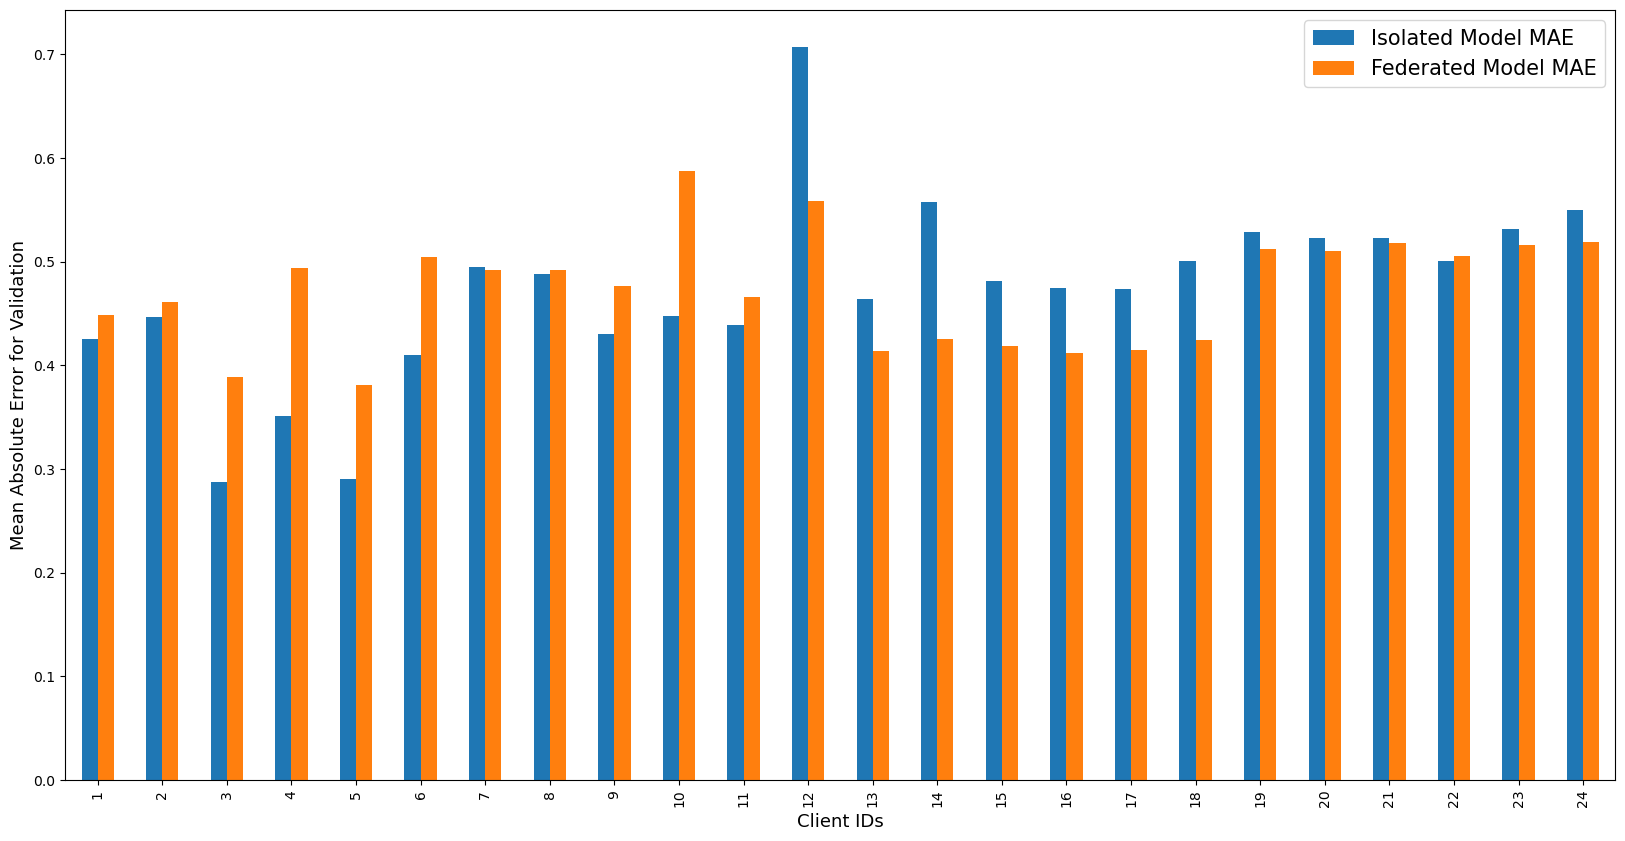

In [26]:
ax = eval_df.plot.bar(x="clients",figsize=(20, 10))
ax.set_ylabel("Mean Absolute Error for Validation",fontdict={'fontsize':13})
ax.set_xlabel("Client IDs",fontdict={'fontsize':13})
ax.legend(fontsize=15, loc="upper right")

In [ ]:
ben_list = []
for index, row in eval_df.iterrows():
    ben_list.append(round(row['Isolated Model MAE']-row['Federated Model MAE'],4))
eval_df["Benefict"] = ben_list

In [ ]:
eval_df.to_csv("insights/benefit_2.csv", index=False)

## 20 round 25 local epochs

In [11]:
global_model_path = 'checkpt/saving/epoch_500/_fedl_global_20_25.pth'
global_model = ShallowNN(features)
global_model.load_state_dict(torch.load(global_model_path))

<All keys matched successfully>

In [12]:
eval_list = []
for client in client_ids:
    
    val_data_path =  "testpt/"+str(client)+".pt"
    val_set = torch.load(val_data_path)
    val_loader = DataLoader(val_set, batch_size, shuffle = True)
    
    isolated_model_path = "checkpt/epoch_500/isolated/batch64_client_"+str(client)+".pth"
    isolated_model =  ShallowNN(features)
    isolated_model.load_state_dict(torch.load(isolated_model_path))
    
    _, _ , isolated_mae = evaluate(isolated_model, val_loader, loss_fn)
    _, _ , global_mae = evaluate(global_model,val_loader,loss_fn)
    
    eval_dict = {"client_id":client, "Isolated Model MAE": round(isolated_mae, 4), "Federated Model MAE" :round(global_mae, 4)}
    eval_list.append(eval_dict)
    
eval_df = pd.DataFrame.from_dict(eval_list)
eval_df["clients"] = [i for i in range(1,25)] 

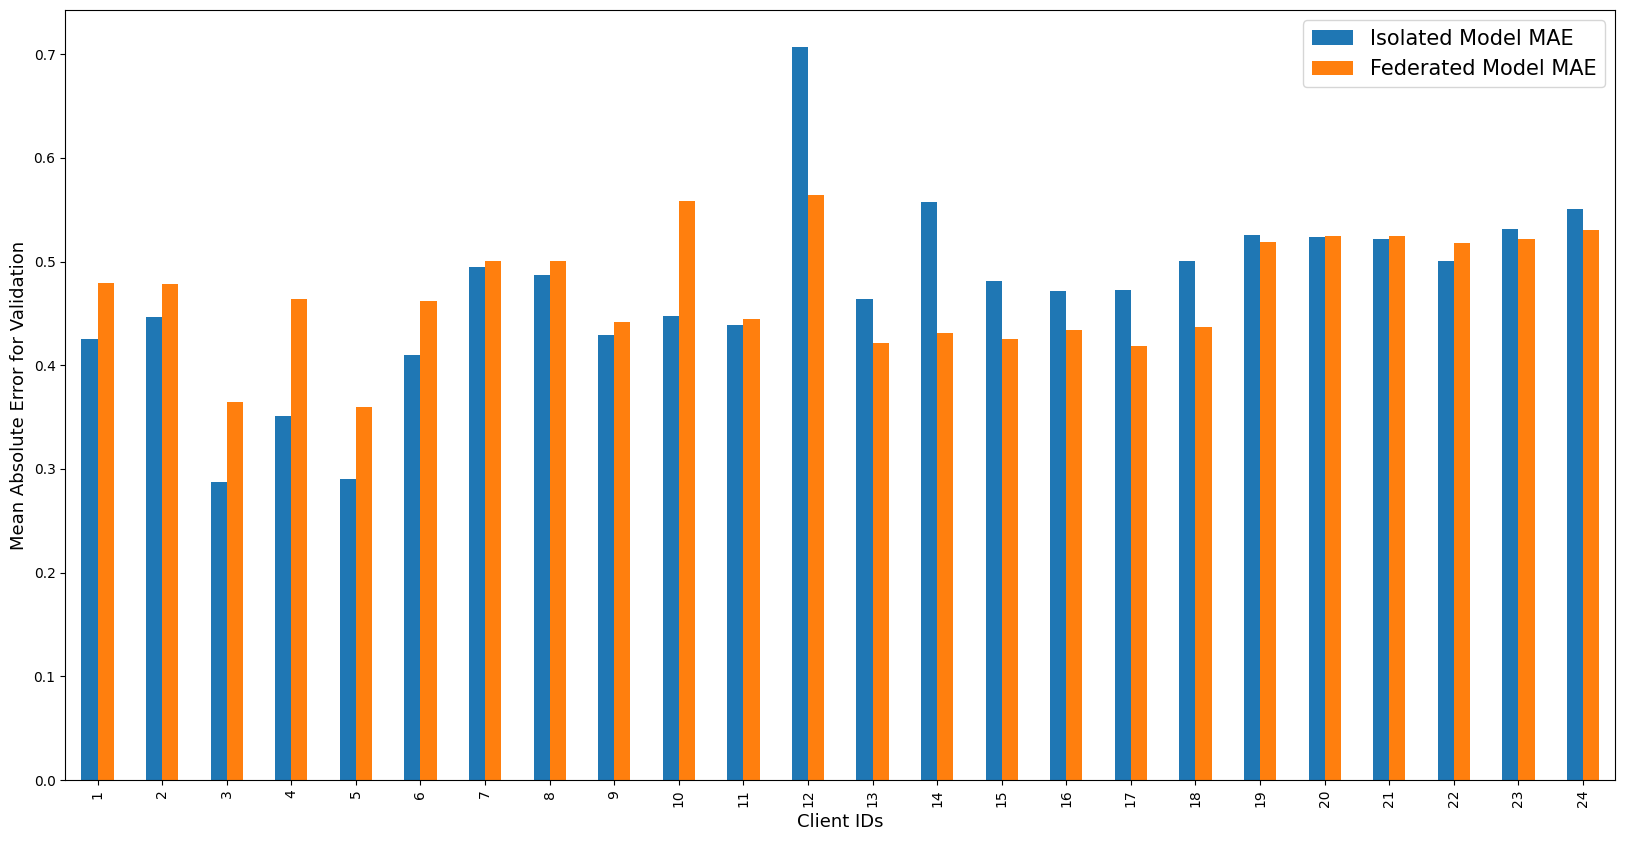

In [13]:
ax = eval_df.plot.bar(x="clients",figsize=(20, 10))
ax.set_ylabel("Mean Absolute Error for Validation",fontdict={'fontsize':13})
ax.set_xlabel("Client IDs",fontdict={'fontsize':13})
ax.legend(fontsize=15, loc="upper right")

In [15]:
ben_list = []
for index, row in eval_df.iterrows():
    ben_list.append(round(row['Isolated Model MAE']-row['Federated Model MAE'],4))
eval_df["benefict"] = ben_list

In [17]:
eval_df.sort_values(by='benefict')

,client_id,Isolated Model MAE,Federated Model MAE,clients,benefict
3,0_3,0.3507,0.4635,4,-0.1128
9,1_3,0.4474,0.5587,10,-0.1113
2,0_2,0.2876,0.3646,3,-0.0770
4,0_4,0.2902,0.3594,5,-0.0692
0,0_0,0.4249,0.4796,1,-0.0547
5,0_5,0.4101,0.4622,6,-0.0521
1,0_1,0.4465,0.4785,2,-0.0320
21,3_3,0.5007,0.5179,22,-0.0172
7,1_1,0.4875,0.5008,8,-0.0133
8,1_2,0.4294,0.4420,9,-0.0126


In [14]:
eval_df.to_csv("insights/benefit_20_25.csv", index=False)